In [1]:
using DataFrames, CSV
using StatsPlots

In [2]:
d = Dict()
files = []

for file in readdir()
    len = length(file)
    i = collect(findlast(".", file))[1]
    extension = file[i:end]
    if extension == ".csv"
        d[file] = DataFrame(CSV.File(file))
        push!(files, file[1:i-1])
    end
end

d

Dict{Any, Any} with 4 entries:
  "oneSided_pooled_0.025.csv"   => 100×4 DataFrame…
  "twoSided_pooled_0.05.csv"    => 100×4 DataFrame…
  "oneSided_unpooled_0.025.csv" => 100×4 DataFrame…
  "twoSided_unpooled_0.05.csv"  => 100×4 DataFrame…

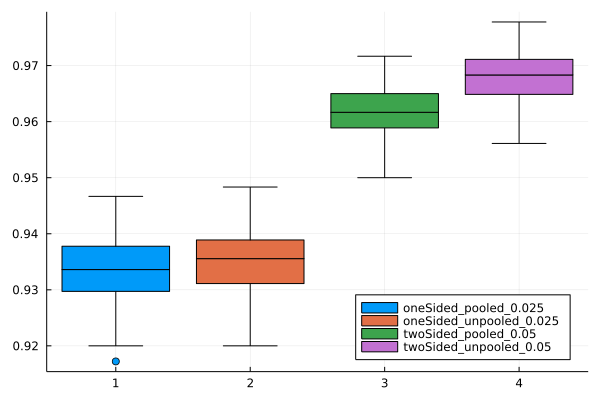

In [7]:
plt = boxplot([df.prob for (_, df) in d], label=hcat(files...), legend = :bottomright)

In [8]:
savefig(plt,"boxplots.png")

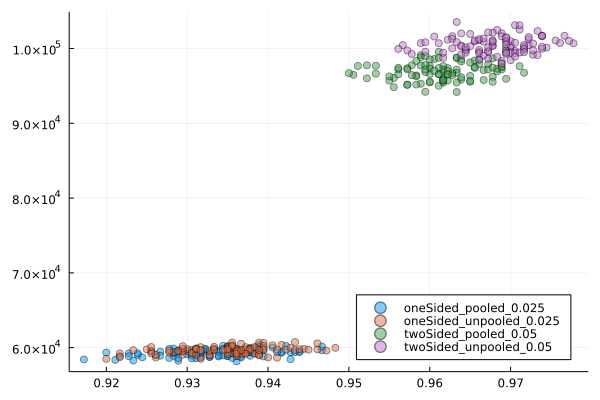

In [22]:
plt = scatter([(df.prob, df.width) for (_, df) in d], label=hcat(files...),
              legend = :bottomright, markeralpha = 0.5)

In [23]:
savefig(plt,"scatter.png")